### Data Science Capstone - Kevin Wang

In [2]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


print('Libraries imported.')

Libraries imported.


In [3]:
!wget -q -O happiness.csv https://datasciencekw.s3.amazonaws.com/2015happiness.csv
!wget -q -O medianincome.csv https://datasciencekw.s3.amazonaws.com/medianincome.csv
!wget -q -O ppp.csv https://datasciencekw.s3.amazonaws.com/GDPPerCapita.csv
!wget -q -O lifeexpectancy.csv https://datasciencekw.s3.amazonaws.com/LifeExpectancy.csv
print('Data loaded.')

Data loaded.


### Data Cleaning

In [4]:
df1 = pd.read_csv('happiness.csv')
namesList1 = ['Country','A','OverallRank','HappinessScore','B','C','D','E','F','G','H','I']
df1.columns = df1.columns[:0].tolist() + namesList1
df1

,Country,A,OverallRank,HappinessScore,B,C,D,E,F,G,H,I
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
df2 = pd.read_csv('medianincome.csv')
namesList2 = ['Country','X','MedianAnnualIncome','Y','MedianIncomeSurveyYear', "Z"]
df2.columns = df2.columns[:0].tolist() + namesList2
df2['MedianAnnualIncome'] = df2['MedianAnnualIncome'].apply(lambda x: x*3*365)
df2


,Country,X,MedianAnnualIncome,Y,MedianIncomeSurveyYear,Z
0,Albania,ALB,7117.5,Europe & Central Asia,2012,c
1,Angola,AGO,3175.5,Sub-Saharan Africa,2009,c
2,Armenia,ARM,5475.0,Europe & Central Asia,2013,c
3,Australia,AUS,48180.0,East Asia & Pacific,2010,i
4,Austria,AUT,51246.0,Europe & Central Asia,2012,i
...,...,...,...,...,...,...
144,Vanuatu,VUT,3942.0,East Asia & Pacific,2010,c
145,Venezuela,VEN,9198.0,Latin America & Caribbean,2006,i
146,Vietnam,VNM,6789.0,East Asia & Pacific,2012,c
147,West Bank and Gaza,WBG,9307.5,Middle East & North Africa,2009,c


In [6]:
df3 = pd.merge(df1[['OverallRank','Country','HappinessScore']], df2[['Country','MedianAnnualIncome']], how="inner", on='Country')
df3

,OverallRank,Country,HappinessScore,MedianAnnualIncome
0,1,Switzerland,7.587,60553.5
1,2,Iceland,7.561,45223.5
2,3,Denmark,7.527,46975.5
3,4,Norway,7.522,65152.5
4,5,Canada,7.427,51355.5
...,...,...,...,...
108,152,Burkina Faso,3.587,1971.0
109,154,Rwanda,3.465,1752.0
110,155,Benin,3.340,1971.0
111,157,Burundi,2.905,1314.0


In [7]:
df4 = pd.read_csv('ppp.csv')
df4.rename(columns={'Country ':'Country'}, inplace=True)
df5 = pd.merge(df3, df4[['Country', '2012']], how="inner", on='Country')
df5.rename(columns={'2012':'GDPPerCapita'}, inplace=True)
df5['GDPPerCapita'] = df5['GDPPerCapita'].apply(lambda x: round(x,1))
df5['MedianAnnualIncome'] = df5['MedianAnnualIncome'].apply(lambda x: round(x,1))
df5['MedianIncome/PerCapita'] = df5['MedianAnnualIncome'] / df5['GDPPerCapita']
df5

,OverallRank,Country,HappinessScore,MedianAnnualIncome,GDPPerCapita,MedianIncome/PerCapita
0,1,Switzerland,7.587,60553.5,57849.6,1.046740
1,2,Iceland,7.561,45223.5,41926.3,1.078643
2,3,Denmark,7.527,46975.5,44804.0,1.048467
3,4,Norway,7.522,65152.5,65354.8,0.996905
4,5,Canada,7.427,51355.5,42189.2,1.217267
...,...,...,...,...,...,...
104,152,Burkina Faso,3.587,1971.0,1550.6,1.271121
105,154,Rwanda,3.465,1752.0,1606.1,1.090841
106,155,Benin,3.340,1971.0,1891.5,1.042030
107,157,Burundi,2.905,1314.0,762.4,1.723505


In [92]:
df6 = pd.read_csv('lifeexpectancy.csv')
df6.rename(columns={'Life expectancy ':'LifeExpectancy'}, inplace=True)
df6.rename(columns={'Schooling':'SchoolingYears'}, inplace=True)
df6.rename(columns={'Alcohol':'AlcoholLitersPerCapita'}, inplace=True)
df7 = df6[df6.Year.isin([2012])]
df8 = pd.merge(df5, df7[['Country', 'LifeExpectancy', 'SchoolingYears', 'AlcoholLitersPerCapita']], how="inner", on='Country')
df8.head(10)

,OverallRank,Country,HappinessScore,MedianAnnualIncome,GDPPerCapita,MedianIncome/PerCapita,LifeExpectancy,SchoolingYears,AlcoholLitersPerCapita
0,1,Switzerland,7.587,60553.5,57849.6,1.046740,82.7,15.7,9.86
1,2,Iceland,7.561,45223.5,41926.3,1.078643,82.5,18.7,7.81
2,3,Denmark,7.527,46975.5,44804.0,1.048467,80.0,18.4,9.26
3,4,Norway,7.522,65152.5,65354.8,0.996905,81.3,17.6,6.21
4,5,Canada,7.427,51355.5,42189.2,1.217267,81.6,15.9,8.30
5,6,Finland,7.406,47085.0,40873.1,1.151980,84.0,17.0,9.24
6,7,Netherlands,7.378,47413.5,47272.1,1.002991,81.1,18.1,9.05
7,8,Sweden,7.364,48837.0,45304.4,1.077975,81.7,15.8,7.40
8,10,Australia,7.284,48180.0,42826.8,1.124996,82.3,20.1,10.03
9,11,Israel,7.278,26061.0,31693.9,0.822272,81.8,15.9,2.78


### Exploratory Data Analysis

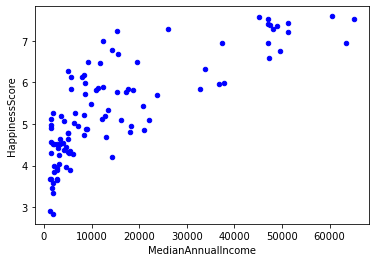

In [93]:
plot1 = df8.plot.scatter(x='MedianAnnualIncome', y='HappinessScore', c='Blue')
plot1

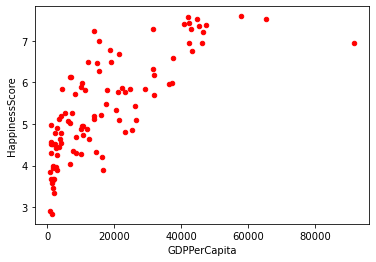

In [94]:
plot2 = df8.plot.scatter(x='GDPPerCapita', y='HappinessScore', c='Red')
plot2

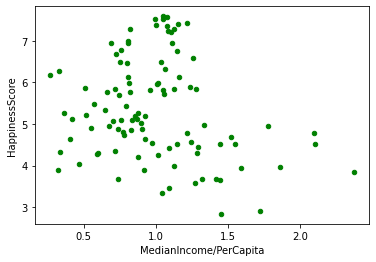

In [95]:
plot3 = df8.plot.scatter(x='MedianIncome/PerCapita', y='HappinessScore', c='Green')
plot3

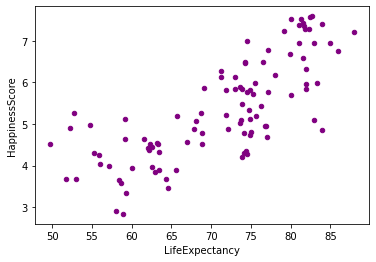

In [96]:
plot4 = df8.plot.scatter(x='LifeExpectancy', y='HappinessScore', c='Purple')
plot4

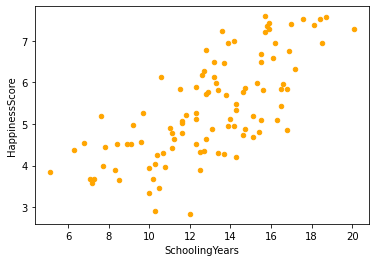

In [97]:
plot5 = df8.plot.scatter(x='SchoolingYears', y='HappinessScore', c='Orange')
plot5

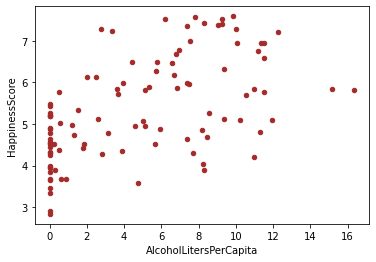

In [98]:
plot6 = df8.plot.scatter(x='AlcoholLitersPerCapita', y='HappinessScore', c='Brown')
plot6

In [196]:
df8['MedianIncome/PerCapita'] = df8['MedianIncome/PerCapita'].apply(lambda x: abs(x - 1))
df8['AlcoholLitersPerCapita'] = df8['AlcoholLitersPerCapita'].apply(lambda x: abs(x - 8))
cdf = df8[df8.notna()]
cdf = cdf.reset_index()
msk = np.random.rand(len(df8)) < 0.8
train = cdf[msk]
test = cdf[~msk]

cdf.head(20)

,index,OverallRank,Country,HappinessScore,MedianAnnualIncome,GDPPerCapita,MedianIncome/PerCapita,LifeExpectancy,SchoolingYears,AlcoholLitersPerCapita
0,0,1,Switzerland,7.587,60553.5,57849.6,0.046740,82.7,15.7,1.86
1,1,2,Iceland,7.561,45223.5,41926.3,0.078643,82.5,18.7,0.19
2,2,3,Denmark,7.527,46975.5,44804.0,0.048467,80.0,18.4,1.26
3,3,4,Norway,7.522,65152.5,65354.8,0.003095,81.3,17.6,1.79
4,4,5,Canada,7.427,51355.5,42189.2,0.217267,81.6,15.9,0.30
5,5,6,Finland,7.406,47085.0,40873.1,0.151980,84.0,17.0,1.24
6,6,7,Netherlands,7.378,47413.5,47272.1,0.002991,81.1,18.1,1.05
7,7,8,Sweden,7.364,48837.0,45304.4,0.077975,81.7,15.8,0.60
8,8,10,Australia,7.284,48180.0,42826.8,0.124996,82.3,20.1,2.03
9,9,11,Israel,7.278,26061.0,31693.9,0.177728,81.8,15.9,5.22


In [215]:
from sklearn import linear_model
regr = linear_model.LinearRegression()


x = np.asanyarray(train[['MedianAnnualIncome','GDPPerCapita','MedianIncome/PerCapita','LifeExpectancy','SchoolingYears','AlcoholLitersPerCapita']])
y = np.asanyarray(train[['HappinessScore']])


regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[ 2.74417262e-05  6.32633004e-06 -2.22168194e-01  3.95047976e-02
   1.07721623e-02 -3.63413354e-02]]
Variance score: 0.69
